In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
!pip install tensorflow

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [4]:
df= pd.read_csv("/content/forestfires (2).csv")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
#preprocessing

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [7]:
#initializing

In [8]:
le=LabelEncoder()
st=StandardScaler()

In [9]:
df["size_category"]=le.fit_transform(df["size_category"])

In [10]:
df["month"]=le.fit_transform(df["month"])

In [11]:
df["day"]=le.fit_transform(df["day"])

In [12]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
#splitting into independent and dependent

In [14]:
x= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [15]:
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#standardizing

In [17]:
x=st.fit_transform(x)

In [18]:
x

array([[ 2.84222252e-01, -1.42312073e+00, -8.05959472e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 9.70871338e-01,  1.17671466e+00, -8.10203395e-03, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [ 9.70871338e-01, -3.83186570e-01, -8.10203395e-03, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.08907592e+00,  1.36780508e-01, -1.64008316e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-1.08907592e+00, -3.83186570e-01,  6.80956663e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 7.41988309e-01,  1.17671466e+00, -2.02087875e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [20]:
xtrain.shape

(413, 30)

In [21]:
#creating model

In [22]:
model=Sequential()

In [23]:
model.add(Dense(20,input_dim=30,activation="relu"))#1st layer

In [24]:
model.add(Dense(15,activation="relu"))#2nd layer

In [25]:
model.add(Dense(2,activation="sigmoid"))#output

In [26]:
#compling the above model

In [42]:
model.compile(loss="mean_squared_error",optimizer="adam",metrics=["accuracy"])

In [43]:
#fitting model

In [44]:


fm= model.fit(xtrain,ytrain,validation_split=0.2,epochs=50,batch_size=50)

Epoch 1/50
7/7 [==============================] - 1s 39ms/step - loss: 0.0817 - accuracy: 0.5485 - val_loss: 0.1212 - val_accuracy: 0.6386
Epoch 2/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0793 - accuracy: 0.5455 - val_loss: 0.1209 - val_accuracy: 0.6265
Epoch 3/50
7/7 [==============================] - 0s 9ms/step - loss: 0.0780 - accuracy: 0.5424 - val_loss: 0.1207 - val_accuracy: 0.6265
Epoch 4/50
7/7 [==============================] - 0s 15ms/step - loss: 0.0768 - accuracy: 0.5394 - val_loss: 0.1182 - val_accuracy: 0.6265
Epoch 5/50
7/7 [==============================] - 0s 9ms/step - loss: 0.0756 - accuracy: 0.5424 - val_loss: 0.1178 - val_accuracy: 0.6265
Epoch 6/50
7/7 [==============================] - 0s 10ms/step - loss: 0.0744 - accuracy: 0.5394 - val_loss: 0.1181 - val_accuracy: 0.6265
Epoch 7/50
7/7 [==============================] - 0s 10ms/step - loss: 0.0733 - accuracy: 0.5394 - val_loss: 0.1170 - val_accuracy: 0.6265
Epoch 8/50
7/7 [=============

In [45]:
sc=model.evaluate(xtrain,ytrain)

13/13 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 0.5908


In [46]:
print(model.metrics_names[1],sc)

accuracy [0.04404064267873764, 0.5907990336418152]


In [47]:

# list all data in history

In [48]:
fm.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [49]:

scr=model.evaluate(xtest,ytest)

4/4 [==============================] - 0s 5ms/step - loss: 0.1253 - accuracy: 0.6442


In [50]:
print(scr)

[0.12530535459518433, 0.6442307829856873]


In [36]:
#visualization

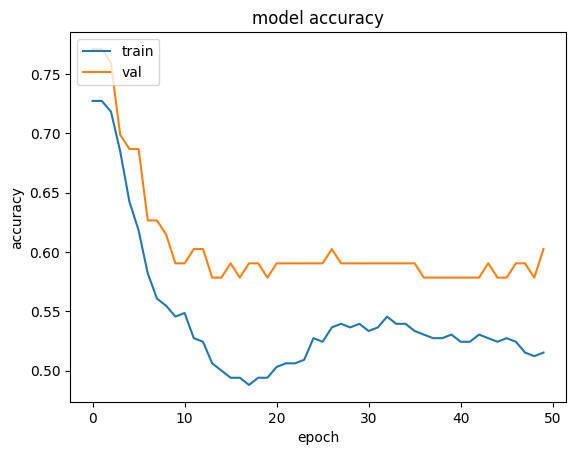

In [37]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(fm.history['accuracy'])
plt.plot(fm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

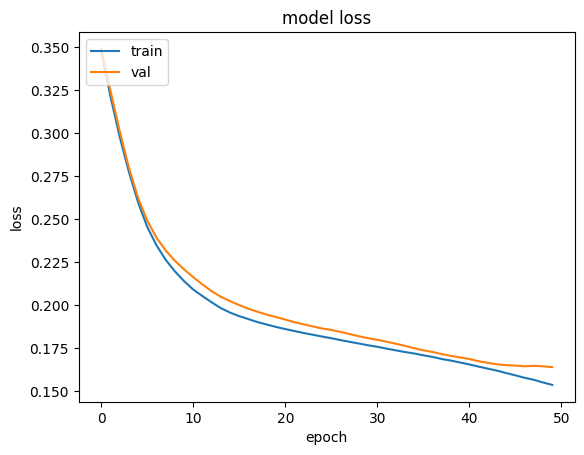

In [38]:
# summarize history for loss
plt.plot(fm.history['loss'])
plt.plot(fm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()